In [18]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
}
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c1a6c6fb-5145-47ef-88cc-678c2bd1d3d0',  # Keep this secret
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(json.dumps(data, indent=2))  # Pretty print
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


{
  "status": {
    "timestamp": "2025-08-10T07:30:48.414Z",
    "error_code": 0,
    "error_message": null,
    "elapsed": 29,
    "credit_count": 1,
    "notice": null,
    "total_count": 9455
  },
  "data": [
    {
      "id": 1,
      "name": "Bitcoin",
      "symbol": "BTC",
      "slug": "bitcoin",
      "num_market_pairs": 12280,
      "date_added": "2010-07-13T00:00:00.000Z",
      "tags": [
        "mineable",
        "pow",
        "sha-256",
        "store-of-value",
        "state-channel",
        "coinbase-ventures-portfolio",
        "three-arrows-capital-portfolio",
        "polychain-capital-portfolio",
        "binance-labs-portfolio",
        "blockchain-capital-portfolio",
        "boostvc-portfolio",
        "cms-holdings-portfolio",
        "dcg-portfolio",
        "dragonfly-capital-portfolio",
        "electric-capital-portfolio",
        "fabric-ventures-portfolio",
        "framework-ventures-portfolio",
        "galaxy-digital-portfolio",
        "huobi-capit

In [19]:
type(data)

dict

In [28]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)




In [29]:
df=pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12280   
1    1027      Ethereum    ETH      ethereum             10435   
2      52           XRP    XRP           xrp              1672   
3     825   Tether USDt   USDT        tether            140781   
4    1839           BNB    BNB           bnb              2660   
5    5426        Solana    SOL        solana               967   
6    3408          USDC   USDC      usd-coin             30385   
7      74      Dogecoin   DOGE      dogecoin              1270   
8    1958          TRON    TRX          tron              1212   
9    2010       Cardano    ADA       cardano              1561   
10   1975     Chainlink   LINK     chainlink              2060   
11  32196   Hyperliquid   HYPE   hyperliquid               125   
12    512       Stellar    XLM       stellar               737   
13  20947           Sui    SUI           sui               739   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-09-13T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2014-08-05T00:00:00.000Z   
13  2022-07-12T08:03:11.000Z   
14  2017-07-23T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
3   [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
4   [marketplace, centralized-exchange, payments, ...           NaN   
5   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
6   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
9   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
10  [platform, defi, oracles, smart-contracts, eth...           NaN   
11  [decentralized-exchange-dex-token, defi, deriv...  1.000000e+09   
12  [medium-of-exchange, enterprise-solutions, dec...  5.000181e+10   
13  [binance-launchpool, coinbase-ventures-portfol...  1.000000e+10   
14  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.990429e+07  1.990429e+07            False       NaN         1   
1         1.207090e+08  1.207090e+08             True       NaN         2   
2         5.930839e+10  9.998588e+10            False       NaN         3   
3         1.645104e+11  1.677832e+11             True       NaN         4   
4         1.392880e+08  1.392880e+08            False       NaN         5   
5         5.393534e+08  6.071886e+08             True       NaN         6   
6         6.527314e+10  6.527314e+10            False       NaN         7   
7         1.504564e+11  1.504564e+11             True       NaN         8   
8         9.469835e+10  9.469835e+10             True       NaN         9   
9         3.542733e+10  4.499097e+10            False       NaN        10   
10        6.781000e+08  1.000000e+09            False       NaN        11   
11        3.339282e+08  9.999939e+08            False       NaN        12   
12        3.128284e+10  5.000179e+10            False       NaN        13   
13        3.511924e+09  1.000000e+10            False       NaN        14   
14        1.990935e+07  1.990935e+07            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [33]:


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'c1a6c6fb-5145-47ef-88cc-678c2bd1d3d0',  # Keep this secret
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(json.dumps(data, indent=2))  # Pretty print
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None  # Exit if request fails

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    # Append to itself (just for example, not needed unless collecting over time)
    df 
    
    if not os.path.isfile(r'C:\Users\Rakshith\Downloads\Crypto API.csv'):
        df.to_csv(r'C:\Users\Rakshith\Downloads\Crypto API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Rakshith\Downloads\Crypto API.csv',mode='a',header=False)


In [34]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API runner completed')
    sleep(60) #sleep for one minute
exit()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


KeyboardInterrupt: 

In [35]:
df

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12280   
1    1027      Ethereum    ETH      ethereum             10435   
2      52           XRP    XRP           xrp              1672   
3     825   Tether USDt   USDT        tether            140785   
4    1839           BNB    BNB           bnb              2660   
5    5426        Solana    SOL        solana               967   
6    3408          USDC   USDC      usd-coin             30386   
7      74      Dogecoin   DOGE      dogecoin              1270   
8    1958          TRON    TRX          tron              1212   
9    2010       Cardano    ADA       cardano              1561   
10   1975     Chainlink   LINK     chainlink              2060   
11  32196   Hyperliquid   HYPE   hyperliquid               125   
12    512       Stellar    XLM       stellar               737   
13  20947           Sui    SUI           sui               739   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-09-13T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2014-08-05T00:00:00.000Z   
13  2022-07-12T08:03:11.000Z   
14  2017-07-23T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [medium-of-exchange, enterprise-solutions, xrp...  1.000000e+11   
3   [stablecoin, asset-backed-stablecoin, usd-stab...           NaN   
4   [marketplace, centralized-exchange, payments, ...           NaN   
5   [pos, platform, solana-ecosystem, cms-holdings...           NaN   
6   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
7   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
8   [media, payments, tron-ecosystem, layer-1, dwf...           NaN   
9   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
10  [platform, defi, oracles, smart-contracts, eth...           NaN   
11  [decentralized-exchange-dex-token, defi, deriv...  1.000000e+09   
12  [medium-of-exchange, enterprise-solutions, dec...  5.000181e+10   
13  [binance-launchpool, coinbase-ventures-portfol...  1.000000e+10   
14  [mineable, pow, sha-256, marketplace, medium-o...  2.100000e+07   

    circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0         1.990432e+07  1.990432e+07            False       NaN         1   
1         1.207090e+08  1.207090e+08             True       NaN         2   
2         5.930839e+10  9.998588e+10            False       NaN         3   
3         1.645104e+11  1.677832e+11             True       NaN         4   
4         1.392880e+08  1.392880e+08            False       NaN         5   
5         5.393531e+08  6.071885e+08             True       NaN         6   
6         6.526157e+10  6.526157e+10            False       NaN         7   
7         1.504570e+11  1.504570e+11             True       NaN         8   
8         9.469832e+10  9.469832e+10             True       NaN         9   
9         3.542733e+10  4.499097e+10            False       NaN        10   
10        6.781000e+08  1.000000e+09            False       NaN        11   
11        3.339282e+08  9.999939e+08            False       NaN        12   
12        3.128284e+10  5.000179e+10            False       NaN        13   
13        3.511924e+09  1.000000e+10            False       NaN        14   
14        1.990936e+07  1.990936e+07            False       NaN        15   

    self_reported_circulating_supply  self_reported_market_cap tvl_

In [45]:
import os
from time import sleep
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import pandas as pd
import json
from datetime import datetime

# Folder to store CSVs
folder_path = r'C:\Users\Rakshith\Downloads\CryptoData'
os.makedirs(folder_path, exist_ok=True)  # Ensure folder exists

def api_runner():
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'c1a6c6fb-5145-47ef-88cc-678c2bd1d3d0',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return None

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    return df

for i in range(3):  # 3 runs for testing
    df_new = api_runner()
    if df_new is not None:
        # Create unique filename with date & time
        timestamp_str = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
        file_path = os.path.join(folder_path, f"Crypto_API_{timestamp_str}.csv")

        # Save each run to its own CSV
        df_new.to_csv(file_path, index=False)
        print(f"Saved: {file_path}")

    print(f'API run {i+1} completed')
    sleep(5)  # Change to 60 for real-time tracking


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Saved: C:\Users\Rakshith\Downloads\CryptoData\Crypto_API_2025-08-10_14-05-10.csv
API run 1 completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Saved: C:\Users\Rakshith\Downloads\CryptoData\Crypto_API_2025-08-10_14-05-16.csv
API run 2 completed


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


Saved: C:\Users\Rakshith\Downloads\CryptoData\Crypto_API_2025-08-10_14-05-23.csv
API run 3 completed


In [46]:
df_master

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12280   
1    1027      Ethereum    ETH      ethereum             10435   
2      52           XRP    XRP           xrp              1672   
3     825   Tether USDt   USDT        tether            140786   
4    1839           BNB    BNB           bnb              2660   
5    5426        Solana    SOL        solana               967   
6    3408          USDC   USDC      usd-coin             30386   
7      74      Dogecoin   DOGE      dogecoin              1270   
8    1958          TRON    TRX          tron              1212   
9    2010       Cardano    ADA       cardano              1561   
10   1975     Chainlink   LINK     chainlink              2060   
11  32196   Hyperliquid   HYPE   hyperliquid               125   
12    512       Stellar    XLM       stellar               737   
13  20947           Sui    SUI           sui               739   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   
15      1       Bitcoin    BTC       bitcoin             12280   
16   1027      Ethereum    ETH      ethereum             10435   
17     52           XRP    XRP           xrp              1672   
18    825   Tether USDt   USDT        tether            140786   
19   1839           BNB    BNB           bnb              2660   
20   5426        Solana    SOL        solana               967   
21   3408          USDC   USDC      usd-coin             30386   
22     74      Dogecoin   DOGE      dogecoin              1270   
23   1958          TRON    TRX          tron              1212   
24   2010       Cardano    ADA       cardano              1561   
25   1975     Chainlink   LINK     chainlink              2060   
26  32196   Hyperliquid   HYPE   hyperliquid               125   
27    512       Stellar    XLM       stellar               737   
28  20947           Sui    SUI           sui               739   
29   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   
30      1       Bitcoin    BTC       bitcoin             12280   
31   1027      Ethereum    ETH      ethereum             10435   
32     52           XRP    XRP           xrp              1672   
33    825   Tether USDt   USDT        tether            140786   
34   1839           BNB    BNB           bnb              2660   
35   5426        Solana    SOL        solana               967   
36   3408          USDC   USDC      usd-coin             30386   
37     74      Dogecoin   DOGE      dogecoin              1270   
38   1958          TRON    TRX          tron              1212   
39   2010       Cardano    ADA       cardano              1561   
40   1975     Chainlink   LINK     chainlink              2060   
41  32196   Hyperliquid   HYPE   hyperliquid               125   
42    512       Stellar    XLM       stellar               737   
43  20947           Sui    SUI           sui               739   
44   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-09-13T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2014-08-05T00:00:00.000Z   
13  2022-07-12T08:03:11.000Z   
14  2017-07-23T00:00:00.000Z   
15  2010-07-13T00:00:00.000Z   
16  2015-08-07T00:00:00.000Z   
17  2013-08-04T00:00:00.000Z   
18  2015-02-25T00:00:00.000Z   
19  2017-07-25T00:00:00.000Z   
20  2020-04-10T00:00:00.000Z   
21  2018-10-08T00:00:00.000Z   
22  2013-12-15T00:00:00.000Z   
23  2017-09-13T00:00:00.000Z   
24  2017-10-01T00:00:00.000Z   
25  2017-09-20T00:00:00.000Z   
26  2024-07-15T10:14:50.000Z   
27  2014-08-05T00:00:00.000Z   
28  2022-07-12T08:03:11.000Z   
29  2017-0

In [51]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [52]:
df_master

id          name symbol          slug  num_market_pairs  \
0       1       Bitcoin    BTC       bitcoin             12280   
1    1027      Ethereum    ETH      ethereum             10435   
2      52           XRP    XRP           xrp              1672   
3     825   Tether USDt   USDT        tether            140786   
4    1839           BNB    BNB           bnb              2660   
5    5426        Solana    SOL        solana               967   
6    3408          USDC   USDC      usd-coin             30386   
7      74      Dogecoin   DOGE      dogecoin              1270   
8    1958          TRON    TRX          tron              1212   
9    2010       Cardano    ADA       cardano              1561   
10   1975     Chainlink   LINK     chainlink              2060   
11  32196   Hyperliquid   HYPE   hyperliquid               125   
12    512       Stellar    XLM       stellar               737   
13  20947           Sui    SUI           sui               739   
14   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   
15      1       Bitcoin    BTC       bitcoin             12280   
16   1027      Ethereum    ETH      ethereum             10435   
17     52           XRP    XRP           xrp              1672   
18    825   Tether USDt   USDT        tether            140786   
19   1839           BNB    BNB           bnb              2660   
20   5426        Solana    SOL        solana               967   
21   3408          USDC   USDC      usd-coin             30386   
22     74      Dogecoin   DOGE      dogecoin              1270   
23   1958          TRON    TRX          tron              1212   
24   2010       Cardano    ADA       cardano              1561   
25   1975     Chainlink   LINK     chainlink              2060   
26  32196   Hyperliquid   HYPE   hyperliquid               125   
27    512       Stellar    XLM       stellar               737   
28  20947           Sui    SUI           sui               739   
29   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   
30      1       Bitcoin    BTC       bitcoin             12280   
31   1027      Ethereum    ETH      ethereum             10435   
32     52           XRP    XRP           xrp              1672   
33    825   Tether USDt   USDT        tether            140786   
34   1839           BNB    BNB           bnb              2660   
35   5426        Solana    SOL        solana               967   
36   3408          USDC   USDC      usd-coin             30386   
37     74      Dogecoin   DOGE      dogecoin              1270   
38   1958          TRON    TRX          tron              1212   
39   2010       Cardano    ADA       cardano              1561   
40   1975     Chainlink   LINK     chainlink              2060   
41  32196   Hyperliquid   HYPE   hyperliquid               125   
42    512       Stellar    XLM       stellar               737   
43  20947           Sui    SUI           sui               739   
44   1831  Bitcoin Cash    BCH  bitcoin-cash              1046   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2013-08-04T00:00:00.000Z   
3   2015-02-25T00:00:00.000Z   
4   2017-07-25T00:00:00.000Z   
5   2020-04-10T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2013-12-15T00:00:00.000Z   
8   2017-09-13T00:00:00.000Z   
9   2017-10-01T00:00:00.000Z   
10  2017-09-20T00:00:00.000Z   
11  2024-07-15T10:14:50.000Z   
12  2014-08-05T00:00:00.000Z   
13  2022-07-12T08:03:11.000Z   
14  2017-07-23T00:00:00.000Z   
15  2010-07-13T00:00:00.000Z   
16  2015-08-07T00:00:00.000Z   
17  2013-08-04T00:00:00.000Z   
18  2015-02-25T00:00:00.000Z   
19  2017-07-25T00:00:00.000Z   
20  2020-04-10T00:00:00.000Z   
21  2018-10-08T00:00:00.000Z   
22  2013-12-15T00:00:00.000Z   
23  2017-09-13T00:00:00.000Z   
24  2017-10-01T00:00:00.000Z   
25  2017-09-20T00:00:00.000Z   
26  2024-07-15T10:14:50.000Z   
27  2014-08-05T00:00:00.000Z   
28  2022-07-12T08:03:11.000Z   
29  2017-0

# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

In [53]:
#Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean() 
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                      
Bitcoin                           0.00758                       1.15979   
Ethereum                         -0.61204                       0.43845   
XRP                              -1.94402                      -4.08268   
Tether USDt                       0.00320                      -0.00040   
BNB                              -1.27747                      -1.16066   
Solana                           -1.07076                      -0.79138   
USDC                             -0.00274                       0.00555   
Dogecoin                         -1.99037                      -1.52733   
TRON                             -0.54674                       0.39810   
Cardano                          -2.09703                      -1.70641   
Chainlink                        -3.20584                       4.76410   
Hyperliquid                      -1.48270                       0.22413   
Stellar                          -2.10188                      -3.39407   
Sui                              -2.09081                      -2.56265   
Bitcoin Cash                     -0.98073                      -3.97540   

              quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                      
Bitcoin                           3.86058                       0.19729   
Ethereum                         21.20824                      40.78163   
XRP                              10.68553                      22.73908   
Tether USDt                       0.02909                      -0.03087   
BNB                               6.75478                      16.50028   
Solana                           10.81259                       9.41302   
USDC                              0.00430                      -0.00327   
Dogecoin                         17.82937                      17.72783   
TRON                              3.61443                      14.47456   
Cardano                           9.38465                      12.19342   
Chainlink                        35.70304                      42.16610   
Hyperliquid                      12.35468                      -4.97499   
Stellar                          14.86285                      42.70569   
Sui                              10.74007                       9.26427   
Bitcoin Cash                      3.83125                       7.71180   

              quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                      
Bitcoin                            7.94001                      13.17685  
Ethereum                          51.11448                      64.52311  
XRP                               37.50210                      32.19411  
Tether USDt                        0.00755                       0.00794  
BNB                               19.10939                      20.88003  
Solana                             7.68523                       2.36517  
USDC                               0.00008                      -0.00761  
Dogecoin                          14.15857                      -4.85286  
TRON                              16.43111                      27.12933  
Cardano                            9.17236                      -3.60878  
Chainlink                         41.73794                      25.29847  
Hyperliquid                        0.54681                      72.73313  
Stellar                           54.44206                      40.62017  
Sui                                8.78167                      -8.39249  
Bitcoin Cash                      26.44103                      36.65845

In [54]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     0.00758
              quote.USD.percent_change_24h    1.15979
              quote.USD.percent_change_7d     3.86058
              quote.USD.percent_change_30d    0.19729
              quote.USD.percent_change_60d    7.94001
              quote.USD.percent_change_90d   13.17685
Ethereum      quote.USD.percent_change_1h    -0.61204
              quote.USD.percent_change_24h    0.43845
              quote.USD.percent_change_7d    21.20824
              quote.USD.percent_change_30d   40.78163
              quote.USD.percent_change_60d   51.11448
              quote.USD.percent_change_90d   64.52311
XRP           quote.USD.percent_change_1h    -1.94402
              quote.USD.percent_change_24h   -4.08268
              quote.USD.percent_change_7d    10.68553
              quote.USD.percent_change_30d   22.73908
              quote.USD.percent_change_60d   37.50210
              quote.USD.percent_change_

In [55]:
type(df4)

pandas.core.series.Series

In [56]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin      quote.USD.percent_change_1h   0.00758
             quote.USD.percent_change_24h  1.15979
             quote.USD.percent_change_7d   3.86058
             quote.USD.percent_change_30d  0.19729
             quote.USD.percent_change_60d  7.94001
             quote.USD.percent_change_90d 13.17685
Ethereum     quote.USD.percent_change_1h  -0.61204
             quote.USD.percent_change_24h  0.43845
             quote.USD.percent_change_7d  21.20824
             quote.USD.percent_change_30d 40.78163
             quote.USD.percent_change_60d 51.11448
             quote.USD.percent_change_90d 64.52311
XRP          quote.USD.percent_change_1h  -1.94402
             quote.USD.percent_change_24h -4.08268
             quote.USD.percent_change_7d  10.68553
             quote.USD.percent_change_30d 22.73908
             quote.USD.percent_change_60d 37.50210
             quote.USD.percent_change_90d 32.19411
Tether USDt  quote.USD.percent_change_1h   0.00320
             quote.USD.percent_change_24h -0.00040
             quote.USD.percent_change_7d   0.02909
             quote.USD.percent_change_30d -0.03087
             quote.USD.percent_change_60d  0.00755
             quote.USD.percent_change_90d  0.00794
BNB          quote.USD.percent_change_1h  -1.27747
             quote.USD.percent_change_24h -1.16066
             quote.USD.percent_change_7d   6.75478
             quote.USD.percent_change_30d 16.50028
             quote.USD.percent_change_60d 19.10939
             quote.USD.percent_change_90d 20.88003
Solana       quote.USD.percent_change_1h  -1.07076
             quote.USD.percent_change_24h -0.79138
             quote.USD.percent_change_7d  10.81259
             quote.USD.percent_change_30d  9.41302
             quote.USD.percent_change_60d  7.68523
             quote.USD.percent_change_90d  2.36517
USDC         quote.USD.percent_change_1h  -0.00274
             quote.USD.percent_change_24h  0.00555
             quote.USD.percent_change_7d   0.00430
             quote.USD.percent_change_30d -0.00327
             quote.USD.percent_change_60d  0.00008
             quote.USD.percent_change_90d -0.00761
Dogecoin     quote.USD.percent_change_1h  -1.99037
             quote.USD.percent_change_24h -1.52733
             quote.USD.percent_change_7d  17.82937
             quote.USD.percent_change_30d 17.72783
             quote.USD.percent_change_60d 14.15857
             quote.USD.percent_change_90d -4.85286
TRON         quote.USD.percent_change_1h  -0.54674
             quote.USD.percent_change_24h  0.39810
             quote.USD.percent_change_7d   3.61443
             quote.USD.percent_change_30d 14.47456
             quote.USD.percent_change_60d 16.43111
             quote.USD.percent_change_90d 27.12933
Cardano      quote.USD.percent_change_1h  -2.09703
             quote.USD.percent_change_24h -1.70641
             quote.USD.percent_change_7d   9.38465
             quote.USD.percent_change_30d 12.19342
             quote.USD.percent_change_60d  9.17236
             quote.USD.percent_change_90d -3.60878
Chainlink    quote.USD.percent_change_1h  -3.20584
             quote.USD.percent_change_24h  4.76410
             quote.USD.percent_change_7d  35.70304
             quote.USD.percent_change_30d 42.16610
             quote.USD.percent_change_60d 41.73794
             quote.USD.percent_change_90d 25.29847
Hyperliquid  quote.USD.percent_change_1h  -1.48270
             quote.USD.percent_change_24h  0.22413
             quote.USD.percent_change_7d  12.35468
             quote.USD.percent_change_30d -4.97499
             quote.USD.percent_change_60d  0.54681
             quote.USD.percent_change_90d 72.73313
Stellar      quote.USD.percent_change_1h  -2.10188
             quote.USD.percent_change_24h -3.39407
             quote.USD.percent_change_7d  14.86285
             quote.USD.percent_change_30d 42.70569
             quote.USD.percent_change_60d 54.44206
             qu

In [57]:
df5.count()

values    90
dtype: int64

In [58]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

values
0   0.00758
1   1.15979
2   3.86058
3   0.19729
4   7.94001
5  13.17685
6  -0.61204
7   0.43845
8  21.20824
9  40.78163
10 51.11448
11 64.52311
12 -1.94402
13 -4.08268
14 10.68553
15 22.73908
16 37.50210
17 32.19411
18  0.00320
19 -0.00040
20  0.02909
21 -0.03087
22  0.00755
23  0.00794
24 -1.27747
25 -1.16066
26  6.75478
27 16.50028
28 19.10939
29 20.88003
30 -1.07076
31 -0.79138
32 10.81259
33  9.41302
34  7.68523
35  2.36517
36 -0.00274
37  0.00555
38  0.00430
39 -0.00327
40  0.00008
41 -0.00761
42 -1.99037
43 -1.52733
44 17.82937
45 17.72783
46 14.15857
47 -4.85286
48 -0.54674
49  0.39810
50  3.61443
51 14.47456
52 16.43111
53 27.12933
54 -2.09703
55 -1.70641
56  9.38465
57 12.19342
58  9.17236
59 -3.60878
60 -3.20584
61  4.76410
62 35.70304
63 42.16610
64 41.73794
65 25.29847
66 -1.48270
67  0.22413
68 12.35468
69 -4.97499
70  0.54681
71 72.73313
72 -2.10188
73 -3.39407
74 14.86285
75 42.70569
76 54.44206
77 40.62017
78 -2.09081
79 -2.56265
80 10.74007
81  9.26427
82  8.78167
83 -8.39249
84 -0.98073
85 -3.97540
86  3.83125
87  7.71180
88 26.44103
89 36.65845

In [66]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

values
0   0.00758
1   1.15979
2   3.86058
3   0.19729
4   7.94001
5  13.17685
6  -0.61204
7   0.43845
8  21.20824
9  40.78163
10 51.11448
11 64.52311
12 -1.94402
13 -4.08268
14 10.68553
15 22.73908
16 37.50210
17 32.19411
18  0.00320
19 -0.00040
20  0.02909
21 -0.03087
22  0.00755
23  0.00794
24 -1.27747
25 -1.16066
26  6.75478
27 16.50028
28 19.10939
29 20.88003
30 -1.07076
31 -0.79138
32 10.81259
33  9.41302
34  7.68523
35  2.36517
36 -0.00274
37  0.00555
38  0.00430
39 -0.00327
40  0.00008
41 -0.00761
42 -1.99037
43 -1.52733
44 17.82937
45 17.72783
46 14.15857
47 -4.85286
48 -0.54674
49  0.39810
50  3.61443
51 14.47456
52 16.43111
53 27.12933
54 -2.09703
55 -1.70641
56  9.38465
57 12.19342
58  9.17236
59 -3.60878
60 -3.20584
61  4.76410
62 35.70304
63 42.16610
64 41.73794
65 25.29847
66 -1.48270
67  0.22413
68 12.35468
69 -4.97499
70  0.54681
71 72.73313
72 -2.10188
73 -3.39407
74 14.86285
75 42.70569
76 54.44206
77 40.62017
78 -2.09081
79 -2.56265
80 10.74007
81  9.26427
82  8.78167
83 -8.39249
84 -0.98073
85 -3.97540
86  3.83125
87  7.71180
88 26.44103
89 36.65845

In [67]:
df7 = df7.rename(columns={
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})
df7




values
0   0.00758
1   1.15979
2   3.86058
3   0.19729
4   7.94001
5  13.17685
6  -0.61204
7   0.43845
8  21.20824
9  40.78163
10 51.11448
11 64.52311
12 -1.94402
13 -4.08268
14 10.68553
15 22.73908
16 37.50210
17 32.19411
18  0.00320
19 -0.00040
20  0.02909
21 -0.03087
22  0.00755
23  0.00794
24 -1.27747
25 -1.16066
26  6.75478
27 16.50028
28 19.10939
29 20.88003
30 -1.07076
31 -0.79138
32 10.81259
33  9.41302
34  7.68523
35  2.36517
36 -0.00274
37  0.00555
38  0.00430
39 -0.00327
40  0.00008
41 -0.00761
42 -1.99037
43 -1.52733
44 17.82937
45 17.72783
46 14.15857
47 -4.85286
48 -0.54674
49  0.39810
50  3.61443
51 14.47456
52 16.43111
53 27.12933
54 -2.09703
55 -1.70641
56  9.38465
57 12.19342
58  9.17236
59 -3.60878
60 -3.20584
61  4.76410
62 35.70304
63 42.16610
64 41.73794
65 25.29847
66 -1.48270
67  0.22413
68 12.35468
69 -4.97499
70  0.54681
71 72.73313
72 -2.10188
73 -3.39407
74 14.86285
75 42.70569
76 54.44206
77 40.62017
78 -2.09081
79 -2.56265
80 10.74007
81  9.26427
82  8.78167
83 -8.39249
84 -0.98073
85 -3.97540
86  3.83125
87  7.71180
88 26.44103
89 36.65845

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt





# Step 3: Plot
sns.catplot(
    x='percent_change', 
    y='values', 
    hue='name', 
    data=df7, 
    kind='point'
)
plt.title("Percent Change for Cryptocurrencies")
plt.show()


ValueError: Could not interpret input 'percent_change'

ValueError: Could not interpret input 'percent_change'

In [72]:
print(df7.columns.tolist())


['values']


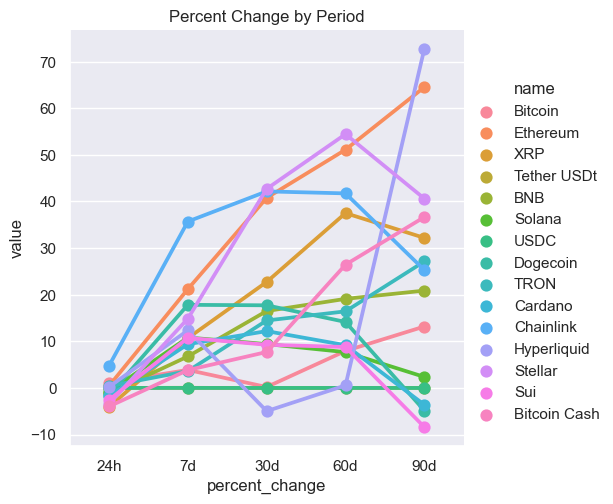

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------
# 1️⃣ Percent change data for catplot
# ------------------------------
        # Keep only the relevant columns
        df3 = df[['name',
                  'quote.USD.percent_change_24h',
                  'quote.USD.percent_change_7d',
                  'quote.USD.percent_change_30d',
                  'quote.USD.percent_change_60d',
                  'quote.USD.percent_change_90d']]

        # Melt into long format
        df_melted = df3.melt(
            id_vars=['name'],
            value_vars=[
                'quote.USD.percent_change_24h',
                'quote.USD.percent_change_7d',
                'quote.USD.percent_change_30d',
                'quote.USD.percent_change_60d',
                'quote.USD.percent_change_90d'
            ],
            var_name='percent_change',
            value_name='value'
        )

        # Clean up the percent_change column names
        df_melted['percent_change'] = df_melted['percent_change'].replace({
            'quote.USD.percent_change_24h': '24h',
            'quote.USD.percent_change_7d': '7d',
            'quote.USD.percent_change_30d': '30d',
            'quote.USD.percent_change_60d': '60d',
            'quote.USD.percent_change_90d': '90d'
        })

        # Plot percent changes
        sns.catplot(x='percent_change', y='value', hue='name', data=df_melted, kind='point')
        plt.title("Percent Change by Period")
        plt.show()

# ------------------------------
# 2️⃣ Bitcoin price time series
# ------------------------------
#df_bitcoin = df[['name', 'quote.USD.price', 'timestamp']]

# Keep only Bitcoin rows
#df_bitcoin = df_bitcoin.query("name == 'Bitcoin'").copy()

# Convert timestamp to datetime
#df_bitcoin['timestamp'] = pd.to_datetime(df_bitcoin['timestamp'])

# Sort by timestamp so the line goes in order
#df_bitcoin = df_bitcoin.sort_values('timestamp')

# Plot
#sns.set_theme(style="darkgrid")
#plt.figure(figsize=(10, 5))
#sns.lineplot(x='timestamp', y='quote.USD.price', data=df_bitcoin, marker="o")
#plt.title("Bitcoin Price Over Time")
#plt.xlabel("Time")
#plt.ylabel("Price (USD)")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()



ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject